# **Project 39: Watermark Image Classifier**

***cv2*** : *OpenCV library used for image processing and computer vision tasks.*

***PIL.Image*** : *Python Imaging Library for opening, manipulating, and saving images.*

***numpy*** : *A powerful library for numerical computing in Python, especially for array and matrix operations.*

**Importing these libraries for for Image Analytics and Image Preprocessing.**

In [24]:
import cv2
import numpy as np
from PIL import Image

**The code opens an image from the specified file path (/content/Image.png) and resizes it twice to dimensions of 500x300 pixels, storing the resized images in image_logow and image_textw. The final line (image_logow) displays the resized image stored in image_logow. Both resized images are the same in this example.**

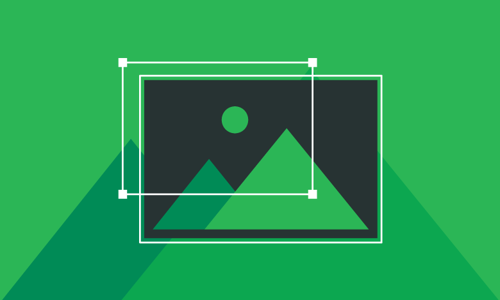

In [25]:
image = Image.open("/content/Image.png")
image_logow = image.resize((500, 300))
image_textw = image.resize((500, 300))
image_logow

**The code opens an image file named Logo.png from the specified path (/content/Logo.png) and stores it in the variable logo. The final line (logo) displays the opened image.**

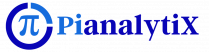

In [26]:
logo = Image.open("/content/Logo.png")
logo

**1: Convert image_logow and logo to RGB format using convert("RGB").**

**2: Transform both images into NumPy arrays for further processing.**

**3: Extract the height (h_image, h_logo) and width (w_image, w_logo) of the main image and logo.**

**4: The third dimension (color channels) is captured but not explicitly used, indicated by _.**

In [27]:
image_logow = np.array(image_logow.convert("RGB"))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert("RGB"))
h_logo, w_logo, _ = logo.shape

**1: Calculate the center coordinates (center_y, center_x) of the main image.**

**2: Determine the top (top_y) and left (left_x) starting positions to center the logo on the main image.**

**3: Compute the bottom (bottom_y) and right (right_x) positions, defining the area where the logo will be placed.**

**4: These coordinates outline the area where the logo will be overlaid on the main image.**

In [28]:
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

**1: Extract the region of interest (ROI) from the main image where the logo will be placed.**

**2: Blend the ROI with the logo using cv2.addWeighted, creating a merged effect.**

**3: Draw horizontal red lines across the center of the image to visually mark the left and right boundaries of the logo.**

**4: Replace the original ROI in the main image with the blended result, embedding the logo onto the main image.**

In [29]:
roi = image_logow[top_y: bottom_y, left_x: right_x]
result = cv2.addWeighted(roi, 1, logo, 1, 0)

cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, h_image), (0, 0, 255), 1)

image_logow[top_y: bottom_y, left_x: right_x] = result

**The code converts the NumPy array image_logow back into a PIL Image with RGB mode. This allows for displaying or further processing of the image with the logo embedded.**

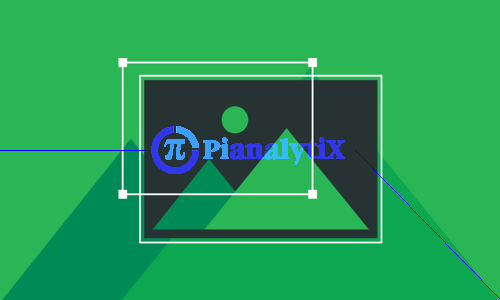

In [30]:
img = Image.fromarray(image_logow, "RGB")
img

**The code converts the PIL image image_textw to a NumPy array and adds a red "Watermark" text overlay at the bottom-right corner using OpenCV's cv2.putText function.**

array([[[ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86],
        ...,
        [ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86]],

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86],
        ...,
        [ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86]],

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86],
        ...,
        [ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86]],

       ...,

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 44, 183,  86],
        ...,
        [ 44, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86]],

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 42, 181,  86],
        ...,
        [ 29, 175,  83],
        [ 44, 182,  86],
        [ 43, 182,  86]],

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 23, 162,  86],
        ...,
        [ 14, 168,  80],
        [ 36, 178,  85],
        [ 44, 182,  86]]], dtype=uint8)
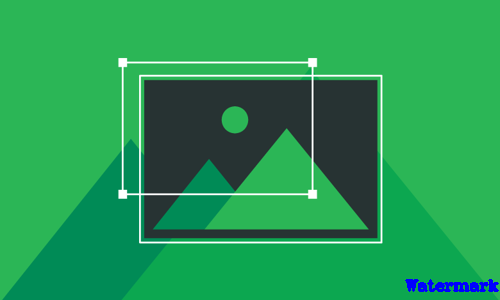

In [31]:
image_text = np.array(image_textw.convert("RGB"))
cv2.putText(image_text, text = "Watermark", org = (w_image - 95, h_image - 10), fontFace = cv2.FONT_HERSHEY_COMPLEX,
            fontScale = 0.5, color = (0, 0, 255), thickness = 2, lineType = cv2.LINE_4)